# 지도 학습

머신러닝의 학습 방법은 크게 지도 학습(supervised learning)과 비지도 학습(unsupervised learning)으로 나눌 수 있다. 
- 지도 학습 : 라벨링이 된 데이터를 학습시키는 것을 의미
- 비지도 학습 : 라벨링이 되지 않은 데이터를 학습 시키는 것을 의미

(여기서 라벨링이란 학습시킬 데이터(train data)에 각각에 맞추고 싶은 정답(target data)이 표시된 것을 의미한다.)

지도학습은 target data의 형태에 따라 분류(classification)와 회귀(regression)로 나눌 수 있다.
- 분류 : target data가 categorical/discrete 형태인 경우, 데이터가 속한 그룹을 찾아내는 것을 의미
- 회귀 : target data가 continuous 형태인 경우, feature variable과 target variable의 관계를 찾아내는 것을 의미

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbblCkC%2FbtqEq8rEkUa%2FLM1DLkUgBku9ApbkTYX90K%2Fimg.png' width='600' height='300'/>

# 회귀

## 선형 회귀

### 가설

**단순 선형 회귀(Univariate Linear Regression)** 는 회귀 문제 중에서 제일 기초가 되는 문제다. 단순 선형 회귀란 분석하고 싶은 두 변수의 관계를 가장 잘 설명하는 직선이 무엇인지를 구현하는 기법이다.

여기서 분석하고 두 변수를 input(feature)과 output(target)으로 분류하고, 이 둘의 관계를 나타내는 함수(단순 선형 회귀에서는 직선이다)를 **가설(Hypothesis)** 이라고 부른다. 단순 선형 회귀에서 가설은 다음과 같이 작성한다.

$$\mathrm{Hypothesis :} \; h_{\theta}(x)=\theta_{0}+\theta_{1}x$$

- $\theta_{1}$ : weight(가중치) of hypothesis
- $\theta_{0}$ : bias(편향) of hypothesis

쉽게 말해, y절편이 $\theta_{0}$고, 기울기가 $\theta_{1}$인 우리가 흔히 아는 1차방정식이다. (가설에서 사용되는 $\theta$들을 parameter라고 부르기도 한다.) 하지만 모든 x, y 조합(변수)이 가설 함수 상에 존재하기란 불가능에 가깝다.

<img src='https://wikidocs.net/images/page/53560/그림3.PNG' width='500' height='320'/>

### 비용 함수 : 평균 제곱 오차(MSE)

그러므로 우리는 parameter $(\theta_{0}, \theta_{1})$를 조정하면서 데이터를 가장 잘 설명하는 가설 함수를 찾아야 한다.

가설 함수와 개별 데이터 간 거리의 제곱의 합을 **비용(cost)** 이라고 한다. 실제 값과 예측 값의 거리이므로 오차라고 해석해도 좋다. 비용 함수는 다음과 같이 작성한다.

$$\mathrm{Cost \; function :} \; J(\theta_{0}, \theta_{1})=\frac{1}{2m}\sum\limits_{i=1}^m(\hat{y}^{i}-y^{i})^{2} = \frac{1}{2m}\sum\limits_{i=1}^m(h_{\theta}(x^{i})-y^{i})^{2}$$

- $m$ : data size
- $i$ : index number of individual data
- $\hat{y}^{i}$ : predicted value of individual data (by linear regression)

위에서 규정한 가설함수를 통해 얻을 수 있는 예측치인 $\hat{y}^{i}$와 원래 결과 값인 $y^{i}$의 차이의 제곱으로 규정한다. (여기서 $\frac{1}{2}$로 나누는 이유는, 추후 경사하강법 단계에서 미분을 하므로 계산상의 편의를 위해서다.)

이를 **평균 제곱 오차(MSE, Mean Squared Error)** 라고 부르기도 한다. 최종적으로 우리는 비용이 작을수록 가설이 데이터를 잘 설명한다고 할 수 있기에, 비용함수를 최소화시키는 것이 선형 회귀에서 우리가 궁극적으로 추구해야 하는 목표라고 할 수 있다.

### 최적화 : 경사하강법(Gradient Descent)

그렇다면 비용 함수를 어떻게 최소화시킬 것인가? 비용 함수를 최소화하기 위해 사용되는 알고리즘을 옵티마이저/최적화 알고리즘이라고 한다. 가장 기본적인 옵티마이저인 경사하강법에 대해 다뤄보겠다.

기계는 1) 임의의 기울기 값을 정하고, 2) 최소값을 향해 기울기 값을 조정해가는데, 이 과정을 **경사하강법(Gradient Descent)** 이라고 한다. 이를 위해 비용 함수의 접선의 기울기가 제일 낮은 0인 곳을 향해, 지속적으로 업데이트 해가는 것이다. (위에서 평균 제곱 오차를 따르는 비용 함수의 경우에는, 2차 함수의 구조를 가지기에 볼록한 부분의 맨 아래 부분에서 cost가 가장 최소값을 가진다.)

$$\mathrm{(repeat \; until \; convergence)} \; \theta_{j} ≔ \theta_{j} - \alpha\frac{\partial}{\partial\theta_{j}}J(\theta_{0},\theta_{1})$$

- ≔ :  assignment(update variable after calculation)
- $\alpha$ : learning rate
- $\frac{\partial}{\partial\theta_{j}}J(\theta_{0},\theta_{1})$ : derivative term

경사하강법의 식은 다음과 같이 작성할 수 있다. 비용 함수 J를 미분한 값에 학습률 $(\alpha)$를 곱해 weight $(\theta_{0})$와 bias $(\theta_{1})$를 지속적으로 업데이트하는 것이다.(정확히 두 parameter 동시에 업데이트한다.)

<img src='https://yganalyst.github.io/assets/images/ML/chap3/gd1.png' width='450' height='270'/>

경사하강법에서 중요한 파라미터는 스텝의 크기로, 학습률(learning rate) 하이퍼파라미터로 결정된다. 학습률이 너무 작으면 계산량이 많아져 시간이 오래 걸리고, 너무 크면 이전보다 비용함수가 커질 수가 있기에 적절한 값으로 설정해야 한다.

<img src='https://yganalyst.github.io/assets/images/ML/chap3/gd2.png' width='450' height='250'/>

경사하강법을 구현하려면 비용함수의 그래디언트를 계산해야 한다.(지속적으로 미분값을 계산해야 한다.) 이 과정에서 훈련 세트에서 얼마 만큼씩 계산하느냐에 따라 경사하강법의 구현방법을 선택할 수 있다.

- **배치 경사하강법(Batch GD)** : 경사하강법 스텝에서 전체 훈련 세트 X에 대한 그래디언트를 계산

    - 배치 크기가 크기 때문에 안정적으로 수렴하는 것은 좋으나, 너무 안정적이기 때문에 local optima 문제가 발생할 가능성이 있다.

- **확률적 경사하강법(Stochastic GD)** : 경사하강법 스텝에서 1개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산

    - 배치 경사하강법에 비해 속도가 빠르며, 전역 최솟값을 찾게 도와준다.
    
    - 여기서 일반적으로 한 반복에서 m(train data의 숫자)번 되풀이되는데, 이때 각 반복을 에포크(epoch)라고 한다.)
    
    - scikit-learn에서 `SGDRegressor`를 사용하면 된다.
    
- **미니배치 경사하강법(Mini Batch GD)** : 경사하강법 스텝에서 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산

    - 배치 경사하강법과 확률적 경사하강법의 개념을 혼합해서 사용한다고 이해해도 된다.

### Regularization

선형 회귀에서 모델의 과대적합을 방지하기 위해 가중치를 제한함으로써 regularization를 가한다. 규제(regularization)는 비용함수에 가중치의 노름(norm)을 더한 함수를 목적 함수(Objective function)으로 설정해 가중치를 제한한다.

- **릿지(Ridge) 회귀** : 릿지는 계수를 **제곱** 한 값을 기준으로 regularization를 적용
    - L2 regularization를 적용한 모델이다.
    - scikit-learn에서 `Ridge`를 사용하면 된다.

$$\mathrm{Cost \; function :} \; J(\theta)=\, \mathrm{MSE}(\theta)+\lambda\frac{1}{2}\sum_{i=1}^{n}\theta_{i}^{2}$$
(여기서 MSE는 위의 비용함수에서 사용했던 평균제곱오차다.)

- **라쏘(Lasso) 회귀** : 라쏘는 계수의 **절댓값** 을 기준으로 regularization를 적용
    - L1 regularization를 적용한 모델이다.
    - scikit-learn에서 `Lasso`를 사용하면 된다.

$$\mathrm{Cost \; function :} \; J(\theta)=\, \mathrm{MSE}(\theta)+\lambda\sum_{i=1}^{n}|\theta_{i}|$$

- $\lambda$ : hyperparameter로 regularization의 강도를 조절함, $\lambda$ 값이 크면 규제 강도가 세지므로 계수 값이 더 줄고 보다 과소적합되도록 유도함
- hyperparameter(하이퍼파라미터) : 모델에서 학습되는 parameter와 달리, 모델 밖에서 직접 규정해줘야 하는 parameter

### 다항 회귀

feature variable과 target variable의 관계가 비선형 데이터이더라도 **다항 회귀**를 활용해 선형 모델로 활용할 수 있다.
- scikit-learn에서 `PolynomialFeatures`를 사용하면 된다.

### 예제

위에서 설명한 로직을 활용해 회귀 문제를 풀어보도록 하겠다. 아래의 예시는 머신러닝의 기초적인 패키지인 scikit-learn에 있는 캘리포니아 주택 가격 데이터를 활용해 서술했다.

In [1]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

dataset에서 DataFrame을 활용해 구조를 파악한 후, feature, target variable을 설정한다.

In [2]:
import pandas as pd
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


우리는 여기서 AveRooms와 AveBedrms 항목 만을 가지고 변수를 파악하도록 하겠다.

In [3]:
df.loc[:,'AveRooms':'AveBedrms']

,AveRooms,AveBedrms
0,6.984127,1.023810
1,6.238137,0.971880
2,8.288136,1.073446
3,5.817352,1.073059
4,6.281853,1.081081
...,...,...
20635,5.045455,1.133333
20636,6.114035,1.315789
20637,5.205543,1.120092
20638,5.329513,1.171920


In [4]:
x_data = dataset.data[:,2:4]
y_data = dataset.target

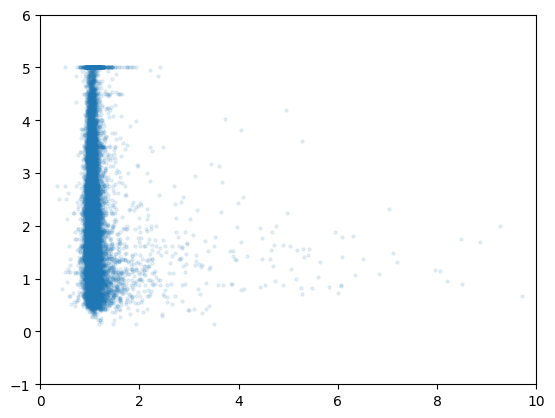

In [5]:
import matplotlib.pyplot as plt
#plt.scatter(x_data[:, 0], y_data, s=5, alpha=0.1)
plt.scatter(x_data[:, 1], y_data, s=5, alpha=0.1)
plt.axis([0,10,-1,6])
plt.show()

train data와 test data를 8:2 비율로 분할한다.

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

예측 오차를 더 줄이기 위해 데이터 표준화를 진행한다.

In [7]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(x_train)

x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

`LinearRegression`을 활용해 선형회귀 모델을 만들고 학습시킨다.

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_std, y_train)
print(lr.coef_, lr.intercept_)

[ 0.75693188 -0.69360863] 2.0694045245881836


확률적 경사하강법은 다음과 같이 `SGDRegressor`을 통해 구현할 수 있다.

In [9]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None)
sgd.fit(x_train_std, y_train)
print(sgd.coef_, sgd.intercept_)

[ 0.71806467 -0.74752185] [2.05351926]


Ridge 함수를 통해 L2 제약식을 적용한다. Ridge 함수에서 alpha 값은 양수여야 하며, 값이 클수록 강한 제약식을 의미한다.

In [10]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(x_train_std, y_train)
print(ridge.coef_, ridge.intercept_)

[ 0.75666879 -0.69334763] 2.0694045245881836


In [11]:
lr_y_predict = lr.predict(x_test_std)
sgd_y_predict = sgd.predict(x_test_std)
rid_y_predict = ridge.predict(x_test_std)
print(lr_y_predict, sgd_y_predict, rid_y_predict)

[2.51325385 2.21381663 2.18547079 ... 0.56044296 2.03893558 1.84394741] [ 2.46580414  2.20229216  2.16460755 ... -0.07982211  2.01239346
  1.8531497 ] [2.51310153 2.21376382 2.18543023 ... 0.56112357 2.03894889 1.84402277]


2차 다항 회귀는 다음과 같이 `PolynomialFeatures`를 통해 구현할 수 있다.

In [12]:
x_data = dataset.data[:,2:4]
y_data = dataset.target

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_data = poly.fit_transform(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

lr = LinearRegression()
lr.fit(x_train_std, y_train)
print(lr.coef_, lr.intercept_)

[-0.01122559  0.00390677] 2.0733288366036815


## 로지스틱 회귀

### 가설

**로지스틱 회귀(Logistic Regression)** 는 이름은 회귀이지만 분류(classification)을 다루는데 활용한다.

로지스틱 회귀에서 가설은 다음과 같이 작성한다. 우리가 선형 회귀에서 사용했던 기존의 가설함수인 $h_{\theta}(x) = \theta^{T}x$의 형태는 결과값이 0과 1 사이의 범위를 만족하지 않는다. 따라서 이를 해결하기 위해 가설함수를 **시그모이드(Sigmoid) 함수** 에 대입해 문제를 푼다. (여기서 가설함수는 최대한 간단하게 작성해보았다.)

$$ \mathrm{sigmoid \, function \, :} \;  \, g(z) = 1/(1+e^{-z})$$

$$ h_{\theta}(x) = \frac{1}{1+e^{-\theta^{T}x}} $$

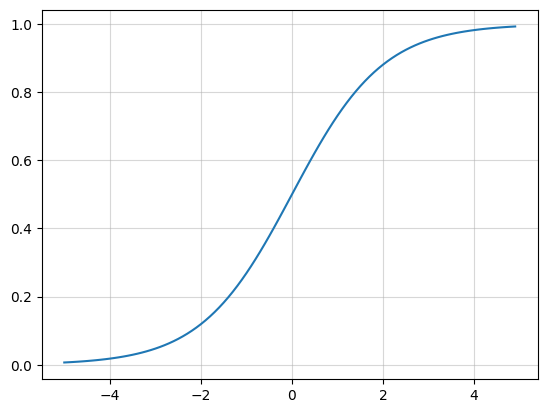

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5, 5, 0.1)

plt.plot(x, 1/(1+np.exp(-x)))
plt.grid(alpha=0.5)
plt.show()

위의 시그모이드 함수는 모든 출력값이 0과 1 사이의 범위에 존재한다. 이제 우리는 로지스틱 회귀에서 분류할 때의 기준을 다음과 같은 규칙을 통해 결정하기로 한다.

$$ \begin{cases} h_{\theta}(x) \geq 0.5 \rightarrow y=1 \\ h_{\theta}(x) < 0.5 \rightarrow y=0 \end{cases}$$

### 비용 함수

우리가 선형회귀에서 사용했던 비용함수를 그대로 적용하면 볼록함수가 아니기 때문에 다음과 같은 함수로 정의한다.

$$Cost(h_{\theta}(x), y) = \begin{cases} -\log(h_{\theta}(x)) \qquad \; \,  (y=1)\\ -\log(1-h_{\theta}(x)) \quad (y=0)\\ \end{cases}$$

$y = 1$인 경우에, $h_{\theta}(x)=1$이면 비용은 0이지만, $h_{\theta}(x)=0$이면 비용은 무한대이다. (반대도 마찬가지다.)

### 다중 분류

로지스틱 회귀를 사용한 다중 분류의 매커니즘은 위의 방식과 동일하다. 다만 시그모이드 함수 대신 **소프트맥스(Softmax)** 를 사용한다. 소프트맥스 함수는 다음과 같이 표시할 수 있다.

$$\sigma_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}$$

위의 시그모이드 함수에 z 자리에 기존 우리가 사용하던 가설 함수를 대입하듯이, 여기도 z에 각 분류 클래스를 설명하는 가설 함수($\theta^{T}x$)를 대입하면 된다. 각자의 z값을 계산한 뒤, 소프트맥스 함수에 대입하면 k개의 분류 클래스 중 가장 확률이 높은 결과 클래스에 분류된다.

### 예제

위에서 설명한 로직을 활용해 로지스틱 회귀 문제를 풀어보도록 하겠다. 아래의 예시는 머신러닝의 기초적인 패키지인 scikit-learn에 있는 붗꽃 종류 데이터를 활용해 서술했다.

In [15]:
from sklearn.datasets import load_iris
dataset = load_iris()

dataset에서 DataFrame을 활용해 구조를 파악한 후, feature, target variable을 설정한다.

In [16]:
import pandas as pd
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


아래에서 붗꽃의 종류가 3개인 것을 확인해볼 수 있다. 이진 분류를 진행하려면 `df = df[df.target != 2]` 다음과 같은 코드를 입력하면 된다.

In [17]:
df.iloc[:, -1].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [18]:
x_data = dataset.data
y_data = dataset.target

train data와 test data를 분할한다.

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

`LogisticRegression`을 활용해 선형회귀 모델을 만들고 학습시킨다.

- `penalty` : 기본적으로 Ridge 규제를 활용하므로 기본값은 'l2'임
- `C` : 규제를 제어하는 매개변수, 작을수록 규제가 커짐, 기본값은 1임

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

로지스틱 회귀 방정식의 계수들은 다음과 같다.

In [21]:
print(lr.coef_, lr.intercept_)

[[-0.46260051  0.86009721 -2.36212144 -1.01507803]
 [ 0.5010376  -0.32573368 -0.17105982 -0.84482658]
 [-0.03843709 -0.53436354  2.53318126  1.85990461]] [  9.7249606    2.05856307 -11.78352367]


위의 계수들로 완성된 로지스틱 회귀 방정식에서 각 요소들을 대입한 결과를 알기 위해서는 `decision_function`을 활용하면 된다. 5번째 요소까지 대입하면 다음과 같은 값이 나온다.

In [22]:
import numpy as np
print(np.round(lr.decision_function(x_train[:5]), decimals=3))

[[-10.234   1.946   8.288]
 [ -2.747   1.493   1.253]
 [ -1.388   2.42   -1.031]
 [ -6.94    1.471   5.469]
 [  6.48    3.163  -9.643]]


다음 출력값을 기준으로 분류 클래스를 예측한 확률을 알기 위해서는 `predict_proba`를 활용하면 된다.

In [23]:
print(np.round(lr.predict_proba(x_train[:5]), decimals=3))

[[0.    0.002 0.998]
 [0.008 0.555 0.437]
 [0.021 0.949 0.03 ]
 [0.    0.018 0.982]
 [0.965 0.035 0.   ]]


위의 결과를 통해, 로지스틱 회귀가 다음과 같이 예측했다는 것을 알 수 있다.

In [24]:
print(lr.predict(x_train[:5]))

[2 1 1 2 0]
